In [6]:
from src.stats_utils import fit_retention_curve, retention_formula, calculate_daily_active_users, calculate_total_revenue, percentage_difference
from src.visual_utils import show_retention_curve

Initialization of data.

In [7]:
installs_per_day = 20_000

days = [1, 3, 7, 14]
retention_A = [0.53, 0.27, 0.17, 0.06]
retention_B = [0.48, 0.25, 0.19, 0.09]

daily_purchase_ratio_A, daily_purchase_ratio_B = [0.0305, 0.0315]
ecpm_A, ecpm_B = [9.8, 10.8]
ad_over_dau_A, ad_over_dau_B = [2.3, 1.6] # Ad impression / DAU

Fitting retention curves

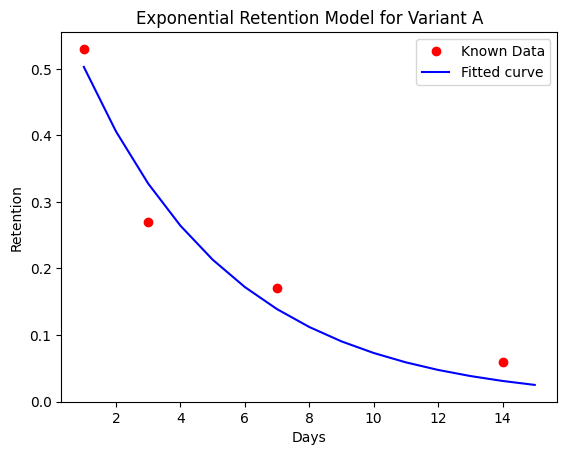

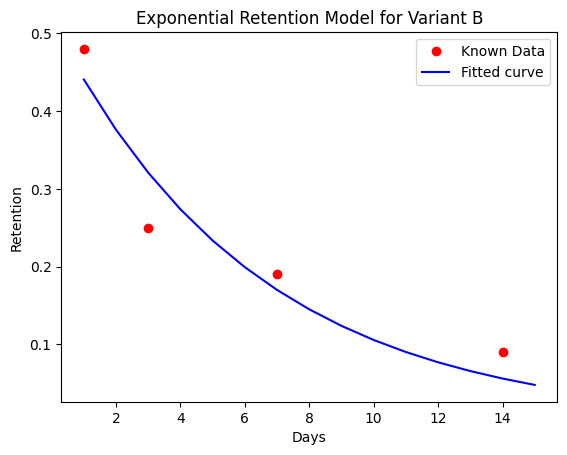

In [8]:
# Get parameters
param_A = fit_retention_curve(days, retention_A)
param_B  = fit_retention_curve(days, retention_B)

# Plot the fitted curves
show_retention_curve(days, retention_A, param_A, name="Variant A")
show_retention_curve(days, retention_B, param_B, name="Variant B")

Part A)

In [10]:

DAU_A = calculate_daily_active_users(15, installs_per_day, param_A)
DAU_B = calculate_daily_active_users(15, installs_per_day, param_B)

print(f"DAU A: {DAU_A}\nDAU B: {DAU_B}")
print(f"Percentage difference: {percentage_difference(DAU_A, DAU_B):.2f}%")

DAU A: 50011
DAU B: 54454
Percentage difference: 9%


Part B)

Assuming average money spent by players per day is the same (or difference is negligible) for the variants.

AMSPP = Average money spent by players per day  
DPR = Total Purchase / DAU  
eCPM = Ad revenue per 1000 impression  

------------------------

Total revenue = sum(Total revenue per day)  
Total revenue per day = ad revenue per day + purchase revenue per day  
Purchase revenue per day = DPR * DAU * AMSPP  
Ad revenue per day = DAU * eCPM / 1000  

In [11]:
total_revenue_A = calculate_total_revenue(1, 15, daily_purchase_ratio_A, ecpm_A, installs_per_day, param_A)
total_revenue_B = calculate_total_revenue(1, 15, daily_purchase_ratio_B, ecpm_B, installs_per_day, param_B)

print(f"For 15 days:\nTotal revenue A: {total_revenue_A:.2f}\nTotal revenue B: {total_revenue_B:.2f}\n")
print(f"Percentage difference: {percentage_difference(total_revenue_A, total_revenue_B):.2f}%")

For 15 days:
Total revenue A: 21054.21
Total revenue B: 22383.04

Percentage difference: 6.31%


Part C)

In [12]:
total_revenue_A = calculate_total_revenue(1, 30, daily_purchase_ratio_A, ecpm_A, installs_per_day, param_A)
total_revenue_B = calculate_total_revenue(1, 30, daily_purchase_ratio_B, ecpm_B, installs_per_day, param_B)
print(f"For 30 days:\nTotal revenue A: {total_revenue_A:.2f}\nTotal revenue B: {total_revenue_B:.2f}\n")
print(f"Percentage difference: {percentage_difference(total_revenue_A, total_revenue_B):.2f}%")


For 30 days:
Total revenue A: 52128.74
Total revenue B: 58998.43

Percentage difference: 13.18%


Part D)

10-day sale starting on 15th day.  
Assuming retentions and installs will be unaffected.  
Assuming that day will also be affected by sale. (15th in this case)  

What is total revenue by day 30? Which variant is better?

Only change is on purchase rate.  
Day 1 -> 15 (excluding): ordinary DPR  
Day 15 -> 25 (excluding): 1% more DPR  
Day 25 -> 30 (excluding): ordinary DPR  
Sum of these will give the total revenue.

In [15]:
revenue_1_A = calculate_total_revenue(1, 15, daily_purchase_ratio_A, ecpm_A, installs_per_day, param_A)
revenue_2_A = calculate_total_revenue(15, 25, daily_purchase_ratio_A + 0.01, ecpm_A, installs_per_day, param_A)
revenue_3_A = calculate_total_revenue(25, 30, daily_purchase_ratio_A, ecpm_A, installs_per_day, param_A)
total_revenue_A = revenue_1_A + revenue_2_A + revenue_3_A

revenue_1_B = calculate_total_revenue(1, 15, daily_purchase_ratio_B, ecpm_B, installs_per_day, param_B)
revenue_2_B = calculate_total_revenue(15, 25, daily_purchase_ratio_B + 0.01, ecpm_B, installs_per_day, param_B)
revenue_3_B = calculate_total_revenue(25, 30, daily_purchase_ratio_B, ecpm_B, installs_per_day, param_B)
total_revenue_B = revenue_1_B + revenue_2_B + revenue_3_B

print(f"For 30 days, with 10-day sale starting 15th:\nTotal revenue A: {total_revenue_A:.2f}\nTotal revenue B: {total_revenue_B:.2f}\n")
print(f"Percentage difference: {percentage_difference(total_revenue_A, total_revenue_B):.2f}%")


For 30 days, with 10-day sale starting 15th:
Total revenue A: 57243.03
Total revenue B: 64697.38

Percentage difference: 13.02%


Part E)

On day 20, new rules apply (including 20th day). 

Updated retention parameters for:  
Variant A: a = 0.58, b = 0.12  
Variant B: a = 0.52, b = 0.10  

Updated installs_per_day values for:  
Old users: 12,000  
New users: 8,000  

Revenue calculation is same for days until 20.  
From 20 to 30,
    12,000 installs with old parameters (retention)
    8,000 installs with new parameters (retention)

In [16]:
new_param_A = [0.58, 0.12]
new_param_B = [0.52, 0.10]

old_source_installs_per_day = 12_000
new_source_installs_per_day = 8_000

revenue_20_A = calculate_total_revenue(1, 20, daily_purchase_ratio_A, ecpm_A, installs_per_day, param_A)
# Old and new source revenue for last 10 days
revenue_old_A = calculate_total_revenue(20, 30, daily_purchase_ratio_A, ecpm_A, old_source_installs_per_day, param_A)
revenue_new_A = calculate_total_revenue(20, 30, daily_purchase_ratio_A, ecpm_A, new_source_installs_per_day, new_param_A)
total_revenue_A = revenue_20_A + revenue_old_A + revenue_new_A

revenue_20_B = calculate_total_revenue(1, 20, daily_purchase_ratio_B, ecpm_B, installs_per_day, param_B)
# Old and new source revenue for last 10 days
revenue_old_B = calculate_total_revenue(20, 30, daily_purchase_ratio_B, ecpm_B, old_source_installs_per_day, param_B)
revenue_new_B = calculate_total_revenue(20, 30, daily_purchase_ratio_B, ecpm_B, new_source_installs_per_day, new_param_B)
total_revenue_B = revenue_20_B + revenue_old_B + revenue_new_B

print(f"For 30 days, with new source introduced on 20th:\nTotal revenue A: {total_revenue_A:.2f}\nTotal revenue B: {total_revenue_B:.2f}\n")
print(f"Percentage difference: {percentage_difference(total_revenue_A, total_revenue_B):.2f}%")


For 30 days, with new source introduced on 20th:
Total revenue A: 59392.37
Total revenue B: 65906.49

Percentage difference: 10.97%
